#Downloading the Dataset

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/uciml/iris")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kairavnandi
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/uciml/iris


100%|██████████| 3.60k/3.60k [00:00<00:00, 6.58MB/s]

#Importing Required Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap as lcm
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as ss
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.metrics import accuracy_score as acc, confusion_matrix as cm, classification_report as cr

#Converting the Dataset into a Dataframe to perform operations

In [19]:
df = pd.read_csv("/content/iris/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [20]:
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df['Species'] = df['Species'].map({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


#Splitting Data into Training and Testing Sets

In [52]:
X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

#Scaling Features

In [53]:
scaler = ss()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Classifying through KNN (K-Nearest Neighbors)

In [54]:
knn =knc(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print(f"KNeighborsClassifier Accuracy:", round(acc(y_test, y_pred_knn), 2))

print("KNeighborsClassifier Confusion Matrix:")
print(cm(y_test, y_pred_knn))

print("KNeighborsClassifier Classification Report:")
print(cr(y_test, y_pred_knn))

KNeighborsClassifier Accuracy: 1.0
KNeighborsClassifier Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#Experimenting with different K values

In [64]:
k_values = [1, 3, 5, 7, 9]
accuracy_scores = []

for k in k_values:
  knn = knc(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acc_knn = acc(y_test, y_pred)
  cm_knn = cm(y_test, y_pred)
  cr_knn = cr(y_test, y_pred)
  accuracy_scores.append(acc_knn)

  print(f"\n--- Results for K = {k} ---")
  print("KNeighborsClassifier Accuracy:", round(acc_knn, 2))
  print("KNeighborsClassifier Confusion Matrix:")
  print(cm_knn)
  print("KNeighborsClassifier Classification Report:")
  print(cr_knn)


--- Results for K = 1 ---
KNeighborsClassifier Accuracy: 1.0
KNeighborsClassifier Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


--- Results for K = 3 ---
KNeighborsClassifier Accuracy: 1.0
KNeighborsClassifier Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                         

#Plotting Accuracy of different K values

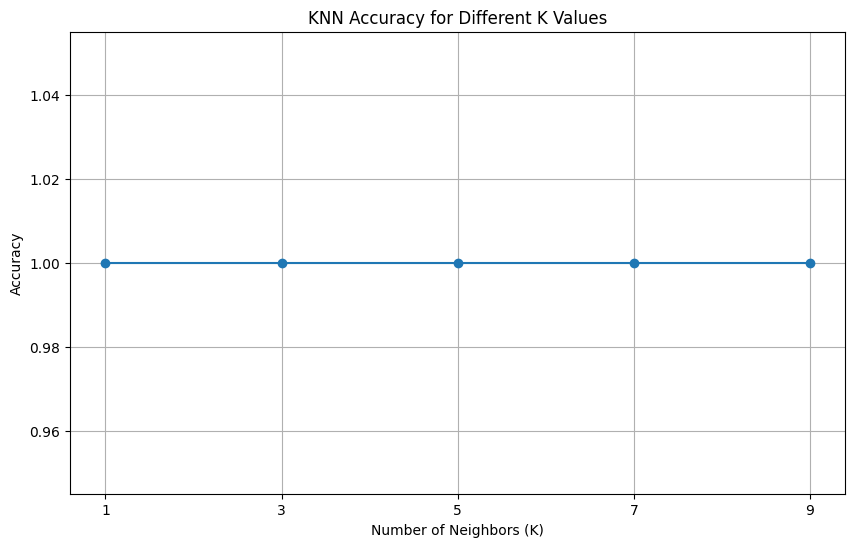

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#Visualizing Decision Boundaries

In [70]:
def plot_bounds(X, y, classifier, indices, title):
    h = .02
    cmap_light = lcm(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = lcm(['#FF0000', '#00FF00', '#0000FF'])

    X_vis = X[:, indices]
    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    for class_value, color in zip([1, 2, 3], ['#FF0000', '#00FF00', '#0000FF']):
        plt.scatter(X_vis[y == class_value, 0],
                    X_vis[y == class_value, 1],
                    c=color, edgecolor='k', s=20,
                    label=df['Species'].map({1:'Iris-setosa', 2:'Iris-versicolor', 3:'Iris-virginica'}).unique()[class_value - 1])

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.legend()
    plt.show()

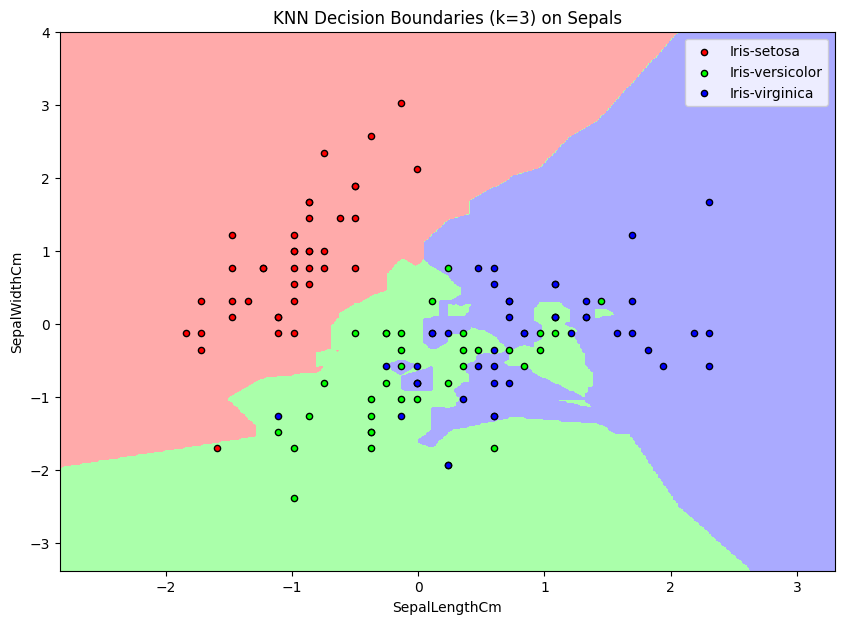

In [71]:
knn_vis = knc(n_neighbors=3)
knn_vis.fit(X_train[:, :2], y_train)
plot_bounds(X_train, y_train, knn_vis, [0, 1], 'KNN Decision Boundaries (k=3) on Sepals')

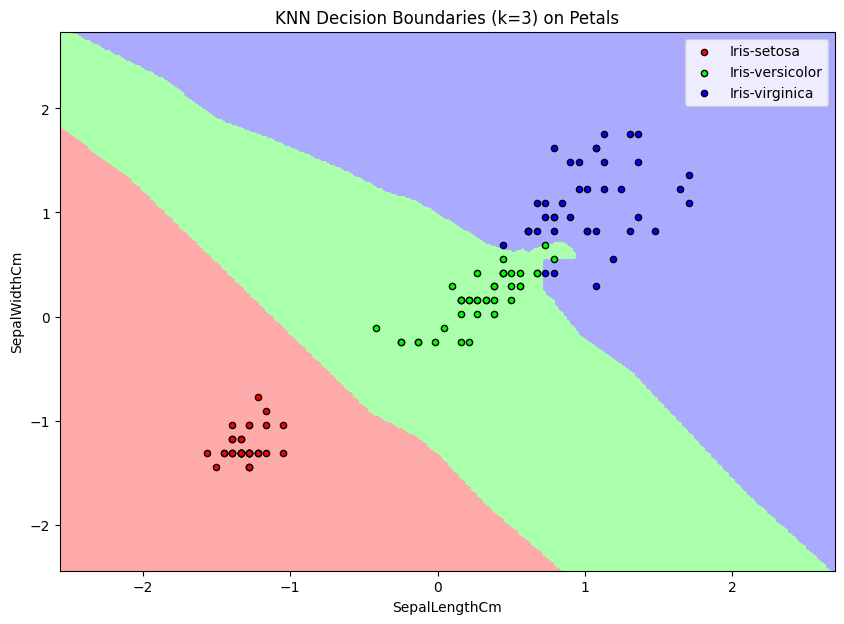

In [72]:
knn_vis = knc(n_neighbors=3)
knn_vis.fit(X_train[:, 2:], y_train)
plot_bounds(X_train, y_train, knn_vis, [2, 3], 'KNN Decision Boundaries (k=3) on Petals')